In [1]:
#librerias a usar
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#cargar archivo csv
data = pd.read_excel('Detalle precios y productos fabricados 2022.xlsx')
data.isnull().sum()

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              2
NOMBRE_CLIENTE               0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

**Antes de empezar los procesos de "Desviación Estándar y Rango Intercuartílico" verifique que el documento no tenga nulos <br>**
En este caso se encontraron dos nulos en NOMBRE_VENDEDOR, así que procedí a sustituirlos.

In [8]:
#Sustituir valores nulos por un string en concreto
data['NOMBRE_VENDEDOR'] = data['NOMBRE_VENDEDOR'].fillna('No disponible')
data.to_excel('Detalle precios y productos fabricados 2022.xlsx')
data.isnull().sum()

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              0
NOMBRE_CLIENTE               0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [9]:
#Verifico los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1426 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CANT                       1426 non-null   int64         
 5   CVE_ART                    1426 non-null   object        
 6   DESCR                      1426 non-null   object        
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

In [14]:
# Índices de columnas cualitativas (object y datetime64)
cualitativas = data.iloc[:, [0, 1, 2, 3, 5, 6]]  
# Índices de columnas cuantitativas (float64 e int64)
cuantitativas = data.iloc[:, [4, 7, 8, 9, 10, 11, 12, 13]]  


In [ ]:
#verificamos que este bien
cualitativas.info()
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CVE_DOC          1426 non-null   object        
 1   FECHA_DOC        1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR  1426 non-null   object        
 3   NOMBRE_CLIENTE   1426 non-null   object        
 4   CVE_ART          1426 non-null   object        
 5   DESCR            1426 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 67.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CANT                       1426 non-null   int64  
 1   PRECIO_UNITARIO            1426 non-null   float64
 2   COSTO_UNITARIO             1426 non-null   float64
 3   COSTO_UNITARIO_CALC

**Diagrama de caja de cada columna**
Para no crear un código extenso creé un array que contiene los nombres de las columnas, con un <br>
ciclo for recorri el array y mostre el diagrama

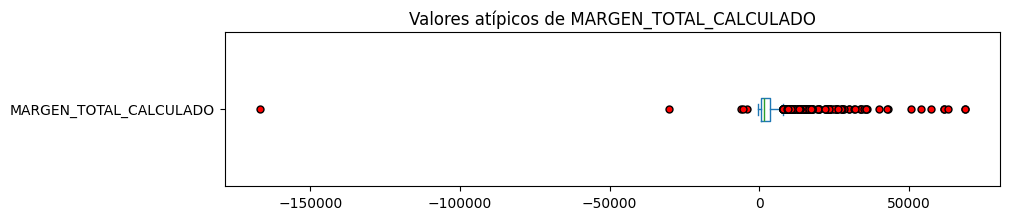

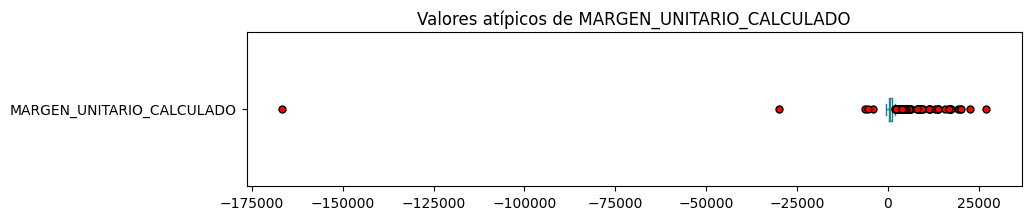

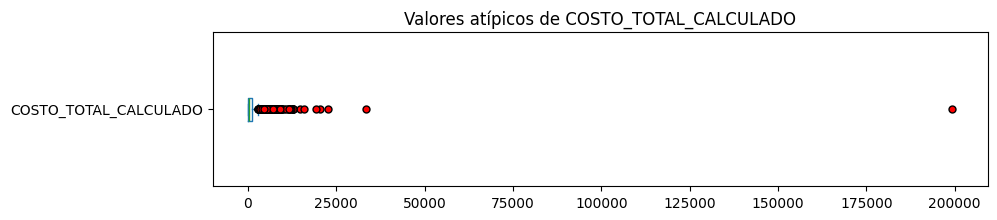

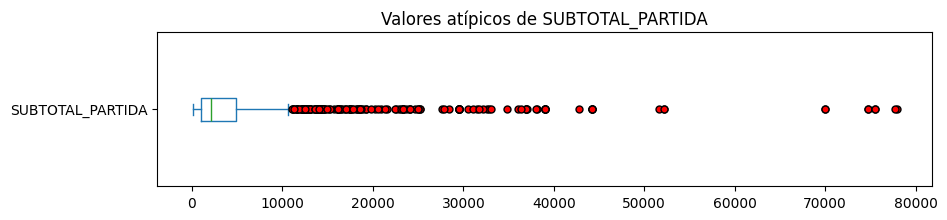

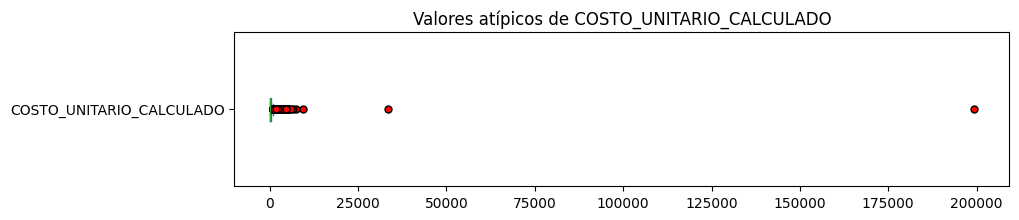

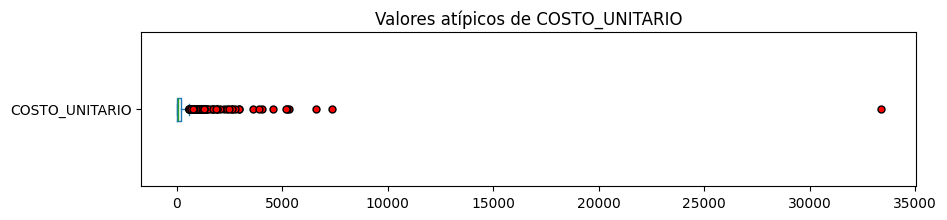

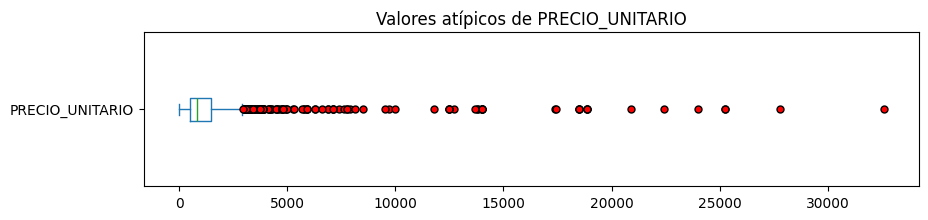

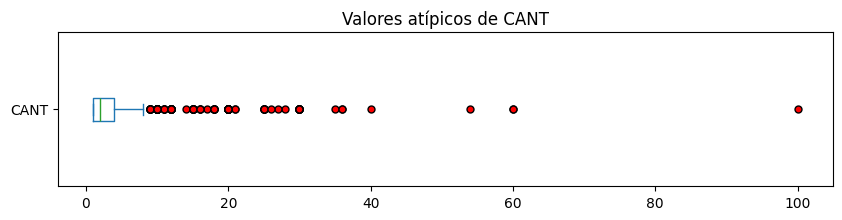

In [ ]:
# array de las columnas 'cuantitativas' 
columnas = ['MARGEN_TOTAL_CALCULADO', 'MARGEN_UNITARIO_CALCULADO', 'COSTO_TOTAL_CALCULADO', 
            'SUBTOTAL_PARTIDA', 'COSTO_UNITARIO_CALCULADO', 'COSTO_UNITARIO', 
            'PRECIO_UNITARIO', 'CANT']

# Crear un diagrama de caja para cada columna
for columna in columnas:
    plt.figure(figsize=(10, 2))
    cuantitativas[columna].plot(kind='box', vert=False, flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
    plt.title(f"Valores atípicos de {columna}")
    plt.show()

**Procesamiento "Desviación estandar" para eliminar outliers en dataframe**

In [27]:
#Metodo aplicando desviaion estandar. Encuentro los valores extremos
y = cuantitativas
Limite_superior = y.mean() + 3*y.std()  
Limite_inferior = y.mean() - 3*y.std()  
print("Limite superior permitido: ", Limite_superior)
print("Limite inferior permitido: ", Limite_inferior)

Limite superior permitido:  CANT                            22.531793
PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
MARGEN_TOTAL_CALCULADO       28691.369713
dtype: float64
Limite inferior permitido:  CANT                           -14.324219
PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
MARGEN_TOTAL_CALCULADO      -21519.643893
dtype: float64


In [28]:
#obtenemos datos y los outliers se convierten en nulos en el Dataframe
data3 = cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]
data3.isnull().sum()

CANT                         28
PRECIO_UNITARIO              29
COSTO_UNITARIO               10
COSTO_UNITARIO_CALCULADO      2
SUBTOTAL_PARTIDA             36
COSTO_TOTAL_CALCULADO         5
MARGEN_UNITARIO_CALCULADO    13
MARGEN_TOTAL_CALCULADO       24
dtype: int64

In [29]:
#Sustituimos los valores nulos por el promedio de la columna
data_clean = data3.copy()
data_clean = data_clean.fillna(round(data3.mean(), 2))
data_clean.isnull().sum()

CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

**Procedimiento "cuantiles" para sustituir outliers en dataframe**

In [30]:
#Metodo para aplicar cuartiles. Encuentro cuartiles de .25 y .75
y = cuantitativas

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q2
iqr = percentile75 - percentile25   

Limite_superior_iqr = percentile75 + 1.5*iqr
Limite_inferior_iqr = percentile75 - 1.5*iqr

print("Limite superior permitido: ", Limite_superior_iqr)
print("Limite inferior permitido: ", Limite_inferior_iqr)

Limite superior permitido:  CANT                             8.50000
PRECIO_UNITARIO               2954.86625
COSTO_UNITARIO                 567.95000
COSTO_UNITARIO_CALCULADO       807.81375
SUBTOTAL_PARTIDA             10783.51250
COSTO_TOTAL_CALCULADO         2971.36250
MARGEN_UNITARIO_CALCULADO     2089.94625
MARGEN_TOTAL_CALCULADO        7807.59750
dtype: float64
Limite inferior permitido:  CANT                           -0.50000
PRECIO_UNITARIO                43.16375
COSTO_UNITARIO               -113.59000
COSTO_UNITARIO_CALCULADO      -53.70375
SUBTOTAL_PARTIDA            -1014.21250
COSTO_TOTAL_CALCULADO        -386.85250
MARGEN_UNITARIO_CALCULADO      56.56875
MARGEN_TOTAL_CALCULADO       -743.91750
dtype: float64


In [31]:
#obtenemos datos limpios del dataframe
data3_iqr = cuantitativas[(y <= Limite_superior_iqr) & (y >= Limite_inferior_iqr)]  
data3_iqr.isnull().sum()

CANT                         169
PRECIO_UNITARIO              128
COSTO_UNITARIO               128
COSTO_UNITARIO_CALCULADO     144
SUBTOTAL_PARTIDA             159
COSTO_TOTAL_CALCULADO        162
MARGEN_UNITARIO_CALCULADO    153
MARGEN_TOTAL_CALCULADO       168
dtype: int64

In [32]:
#Reemplazar valores atipicos (nulos) del dataframe con "mean"
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(), 2))
data4_iqr.isnull().sum()

CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [33]:
#unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1426 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CVE_ART                    1426 non-null   object        
 5   DESCR                      1426 non-null   object        
 6   CANT                       1426 non-null   float64       
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

In [34]:
Datos_limpios.isnull().sum()

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              0
NOMBRE_CLIENTE               0
CVE_ART                      0
DESCR                        0
CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [35]:
Datos_limpios.to_excel('Detalle precios y productos fabricados 2022 Datos_limpios.xlsx')